# Mathematical Notation for Representing Models (COMPLETE)


## Chapter 5.8-5.10 Overview Notebook

In [1]:
# run this to set up the notebook
library(coursekata)

# load functions
source("https://raw.githubusercontent.com/UCLATALL/stopwatch/refs/heads/main/add_sd_ruler.R")
source("https://raw.githubusercontent.com/UCLATALL/stopwatch/refs/heads/main/gf_resid.R")
source("https://raw.githubusercontent.com/UCLATALL/stopwatch/refs/heads/main/gf_square_resid.R")

# set styles
css <- suppressWarnings(readLines("https://raw.githubusercontent.com/jimstigler/jupyter/master/ck_jupyter_styles_v2.css"))
IRdisplay::display_html(sprintf('<style>%s</style>', paste(css, collapse = "\n")))

# load lungs data
lungs <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSz3JaTYY0RXoLQU-o1S45MDKudy6QfIQDtGLGoiy54JOydB7iELKxGbPqo_0uEvKUGCpZ_UQxu4PgM/pub?gid=1447217380&single=true&output=csv")

# create FEV_data
FEV <- c(3.0,3.2,3.8,4.6,3.8,2.3,4.8,4.1)
row <- c(1:8)
FEV_data <- data.frame(row, FEV)

── CourseKata packages ──────────────────────────────────── coursekata 0.18.0 ──
✔ dslabs              0.7.6         ✔ Metrics             0.1.4  
✔ Lock5withR          1.2.2         ✔ lsr                 0.5.2  
✔ fivethirtyeightdata 0.1.0         ✔ mosaic              1.8.4.2
✔ fivethirtyeight     0.6.2         ✔ supernova           2.5.7  


<div class="teacher-note">
<b>Section Goals:</b> In this section, students are introduced to the notation of the General Linear Model (GLM), which will be used for the rest of the book as a way of representing different kinds of models. They will understand the important distinction between statistics and parameters, and that when fitting the empty model they are actually estimating a parameter, which is then used to generate model predictions.

- Students will learn to represent the empty model in both specific mathematical notation (as $\bar{Y}$) and in the notation of the GLM (as $b_0$). 
- Students will write the empty model as $Y_i=b_0+e_i$. They will learn why Y and e each have a subscript i, whereas $b_0$ does not.
- Students also will learn to represent parameters using Greek letters and parameter estimates using Roman letters.

</ul>
A <a href="https://docs.google.com/document/d/1sAFEHwhelFZOb7k9DSB9P6QSlS2tC4CgKOc1CMUWz54/edit?tab=t.5y2a0ykmi2fk" target="_blank">printable student guided-notes worksheet</a> is available to go with this Jupyter notebook, as well as a student version of this notebook.
</div>

## 1 Mathematical Notation for Representing the Empty Model

In statistical modeling, we model data like this: 

> **DATA = MODEL + ERROR** 

1. Remembering that a model is a function that generates a predicted value for every row of a dataset, we first must ***specify*** what function we want to use as a model. In our model of FEV (Forced Expiratory Volume), we have been using the mean as a model, also known as the empty model. We specified the model in a word equation like this:

> **FEV = mean + error**

2. After we specify the model, the next step is to **fit** the model to our small dataset of 8 students. For this we use the code `lm(FEV ~ NULL, data = FEV_data)`. Here's the fit model in a word equation:

> **FEV = 3.7 + error**


### 1.1 Run the code in the cell below to see a visualization of the data, model and error

We have overlaid the best-fitting model (i.e., the mean) on the graph of the 8 data points below. Error (i.e., residuals) is represented as the distance between each data point and the model prediction for that data point. 

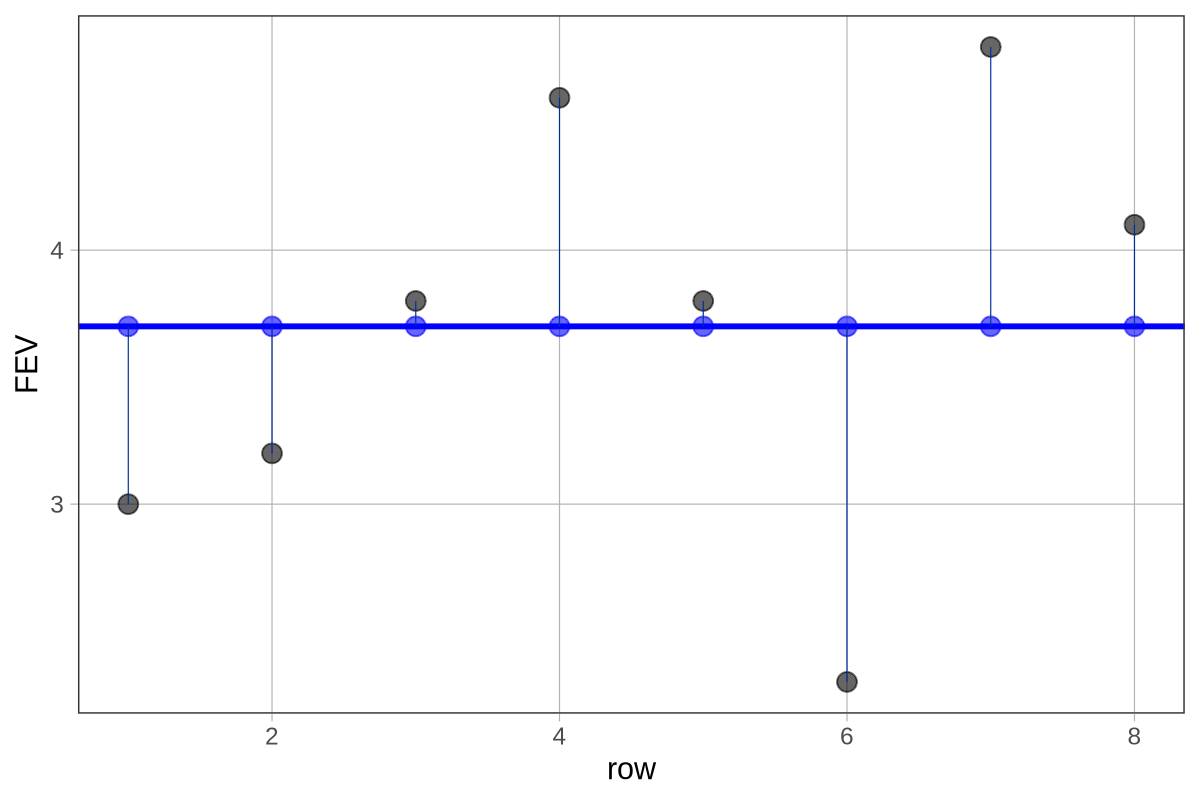

In [2]:
# run this code
empty_model <- lm(FEV ~ NULL, data = FEV_data)

gf_point(FEV ~ row, data = FEV_data, size=3) %>%
  gf_point(predict(empty_model) ~ row, data = FEV_data, size=3, color="blue") %>%
  gf_model(empty_model, color = "blue") %>%
  gf_resid(empty_model)

<div class="guided-notes">

### 1.2 In the graph, label one example of each part of the equation: FEV = 3.7 + residual

- **FEV**: the actual FEV for one student 
- **3.7**: the empty model (i.e., the mean, 3.7)  
- **residual**: how far off the prediction was from the actual FEV

</div>

<div class="guided-notes">

### 1.3 You labeled the empty model on the graph. Now circle a few of the specific predictions made by the model. What's the difference between the model and a prediction? 

</div>


<div class="teacher-note">
    
**Teacher Note:** You might suggest students think of the **model** like a **recipe**. It tells you how to make a dish but the recipe itself isn’t the dish that results. Similarly, a model is a function or rule that generates a prediction, much like a recipe generates a specific meal. The model is like a recipe, the prediction is like the dish that results.

</div>

<div class="discussion-question">
<h3>1.4 Discussion Question: What does it mean to say DATA = MODEL + ERROR? Where do you see that idea in the graph above?</h3>

</div>

<div class="teacher-note">

**Sample Responses:**
- The data are the dots (people’s actual FEV values).
- The model is the horizontal line. It predicts the same value (3.7) for everyone.
- The error is the distance between the dots and the line, the residuals.
- So each data point can be thought of as the model’s prediction plus the error for that person. (3.7 plus the residual -- positive or negative -- will result in the FEV for that person.)

**Teacher Note:**
The goal is to ground DATA = MODEL + ERROR in the graph so students can see how every data point is represented as a combination of a model's prediction and its error.

</div>

### 1.5 Introducing Notation of the General Linear Model (GLM)

We have written the empty model in two ways so far: as a word equation and as a line of R code (the code we use to fit the model). Here we add one more method for representing models, and that is the mathematical notation of the General Linear Model (which we will refer to from here on out as GLM notation). 

To specify the empty model in a word equation we write:

**FEV = mean + error**

In GLM notation we can represent the same idea like this:

<p style="font-size: 14pt">$Y_i = b_0 + e_i$</p>

<div class="guided-notes">

### 1.6 Fill in the empty cells with the corresponding GLM notation

</div>

<table border="1" style="font-size: 18px; margin-right: 0; border-collapse: collapse; width: 100%">
  <thead>
    <tr>
      <th style="border: 1px solid black;"></th>
      <th style="border: 1px solid black; text-align: left;">DATA</th>
      <th style="border: 1px solid black; text-align: left;">MODEL</th>
      <th style="border: 1px solid black; text-align: left;">ERROR</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; text-align: left;">Word Equation</td>
      <td style="border: 1px solid black; text-align: left;">FEV</td>
      <td style="border: 1px solid black; text-align: left;">mean</td>
      <td style="border: 1px solid black; text-align: left;">error</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; text-align: left;">GLM Notation</td>
      <td style="border: 1px solid black; text-align: left;"> </td>
      <td style="border: 1px solid black;"> </td>
      <td style="border: 1px solid black;"> </td>
    </tr>
    <tr>
      <td style="border: 1px solid black; text-align: left;">What It Represents</td>
      <td style="border: 1px solid black; text-align: left;">An individual’s score on FEV (the outcome)</td>
      <td style="border: 1px solid black; text-align: left;">The model’s predicted value (the mean)</td>
      <td style="border: 1px solid black; text-align: left;">The difference between actual and predicted (the residual)</td>
    </tr>
  </tbody>
</table>

<div class="teacher-note">
    
**Teacher Note:** Let students try filling in the notation before you explain to them what the symbols represent. We include some explanation in the next cell.

</div>

### 1.7 Digging Deeper Into the Notation: $Y_i = b_0 + e_i$

- $Y$ is the way statisticians typically represent the outcome variable. If we add the subscript $i$ as in $Y_i$ it means the value on the outcome variable for row $i$ in the dataset. This is the DATA part of DATA = MODEL + ERROR.
- $b_0$ (pronounced "b-sub-0") represents the model, which in this case is the mean of $Y$. This is the model part of the statement DATA = MODEL + ERROR. It represents the function that generates the prediction.
- $e_i$ (pronounced "e-sub-i") represents the residual (or error) for row $i$. This is the ERROR part of DATA = MODEL + ERROR.

<div class="guided-notes">

### 1.8 Label parts of the graph using GLM notation

In the graph, label one example of each of the following:

- $Y_i$: the actual FEV for one student (student *i*)
- $b_0$: the model (the mean, 3.7)  
- $e_i$: the residual representing how far off the prediction was from the actual FEV for student *i*

</div>

In [ ]:
# run this code to display the graph again
empty_model <- lm(FEV ~ NULL, data = FEV_data)

gf_point(FEV ~ row, data = FEV_data, size=3) %>%
  gf_point(predict(empty_model) ~ row, data = FEV_data, size=3, color="blue") %>%
  gf_model(empty_model, color = "blue") %>%
  gf_resid(empty_model)

### 1.9 One More Symbol: $\hat{Y}$ (Y-Hat)

The empty model in GLM notation is $b_0$. That represents the function (or recipe) used to make predictions. When we apply that function to each person in the dataset, we get a predicted value for their FEV. While their actual data is written as $Y_i$, their FEV as predicted by the model is written as $\hat{Y}_i$ (pronounced “Y-hat-sub-i”). Circle a few predictions on the graph and label them as $\hat{Y}_i$.

<div class="guided-notes">

### 1.10 Circle a few predictions on the graph and label them $\hat{Y}_i$ 
    
</div>


<div class="guided-notes">
    
### 1.11 The table below shows the data used to make the scatterplot. 
- Fill in the empty cells using what you know about the relationship: DATA = MODEL + ERROR.
- Label each column (inside the parentheses) with the appropriate GLM notation: $Y_i$, $\hat{Y}_i$, or $e_i$
    
</div>

<table style="font-size: 18px; margin-left: 0; border-collapse: collapse; width: 80%;">
  <thead>
    <tr>
      <th style="border: 1px solid black; text-align: center">Row</th>
      <th style="border: 1px solid black; text-align: center">FEV<br>(____)</th>
      <th style="border: 1px solid black; text-align: center">Prediction<br>(____)</th>
      <th style="border: 1px solid black; text-align: center">Residual<br>(____)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; text-align: center">1</td>
      <td style="border: 1px solid black; text-align: center">3.0</td>
      <td style="border: 1px solid black; text-align: center">3.7</td>
      <td style="border: 1px solid black; text-align: center">-0.7</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; text-align: center">2</td>
      <td style="border: 1px solid black; text-align: center"></td>
      <td style="border: 1px solid black; text-align: center">3.7</td>
      <td style="border: 1px solid black; text-align: center">-0.5</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; text-align: center">3</td>
      <td style="border: 1px solid black; text-align: center">3.8</td>
      <td style="border: 1px solid black; text-align: center"></td>
      <td style="border: 1px solid black; text-align: center">0.1</td>
    </tr>
    <tr> 
      <td style="border: 1px solid black; text-align: center">4</td>
      <td style="border: 1px solid black; text-align: center">4.6</td>
      <td style="border: 1px solid black; text-align: center">3.7</td>
      <td style="border: 1px solid black; text-align: center"></td>
    </tr>
    <tr> 
      <td style="border: 1px solid black; text-align: center">5</td>
      <td style="border: 1px solid black; text-align: center"></td>
      <td style="border: 1px solid black; text-align: center">3.7</td>
      <td style="border: 1px solid black; text-align: center">0.1</td>
    </tr>
    <tr> 
      <td style="border: 1px solid black; text-align: center">6</td>
      <td style="border: 1px solid black; text-align: center">2.3</td>
      <td style="border: 1px solid black; text-align: center"></td>
      <td style="border: 1px solid black; text-align: center">-1.4</td>
    </tr>
    <tr> 
      <td style="border: 1px solid black; text-align: center">7</td>
      <td style="border: 1px solid black; text-align: center">4.8</td>
      <td style="border: 1px solid black; text-align: center">3.7</td>
      <td style="border: 1px solid black; text-align: center"></td>
    </tr> 
    <tr>
      <td style="border: 1px solid black; text-align: center">8</td>
      <td style="border: 1px solid black; text-align: center">4.1</td>
      <td style="border: 1px solid black; text-align: center">3.7</td>
      <td style="border: 1px solid black; text-align: center">0.4</td>
    </tr>
  </tbody>
</table>

<div class="discussion-question">
    
### 1.12 Notice that $Y_i$, $\hat{Y}_i$, and $e_i$, all have the subscript $i$. Why do these elements have the subscript $i$, whereas the $b_0$ does not?
    
</div>

<div class="teacher-note">
    
**Teacher Note:** The *i* stands for each row of the dataset. So, for example, the FEV score for the student in row 4 would be written $Y_4$. The $b_0$ represents the model. All predictions are made using the same model for everyone. There is not a different model for each row, so no need for the sub-*i*.

</div>

<div class="discussion-question">
    
### 1.13 Starting with the general equation for the empty model $Y_i=b_0+e_i$,
- Which element in the equation could be substituted with $\hat{Y}_i$? Explain.
- Would it be correct to write $\hat{Y}_i=b_0$? Why or why not.
    
</div>

<div class="teacher-note">
    
**Teacher Note:** The $b_0$ could be replaced by $\hat{Y}_i$; DATA = MODEL PREDICTION + ERROR. Many students will think it is the $Y_i$ that could be replaced, but that doesn't add up. You could indeed write $\hat{Y}_i=b_0$. The MODEL (represented by $b_0$) generates a prediction for each row. There is no need for an error term because we are not including the actual data in the equation.

</div>

<img src="https://coursekata-course-assets.s3.us-west-1.amazonaws.com/UCLATALL/czi-stats-course/5.8_graph_and_table_2.png"></img>

<div class="discussion-question">
<h3>1.14 Discussion Question: How do the residuals in the table relate to what you see in the graph?</h3>
</div>

<div class="teacher-note">

**Sample Responses:**
- The negative residuals are for dots that are below the line. This means the model prediction was too high. (Opposite pattern for positive residuals.)
- The farther a dot is from the line, the bigger the absolute value of the residual in the table.
- Row 6 had the biggest residual — and you can see it has the longest vertical line.
- You can see the same patterns in the graph and the table: the data vary (dots go up and down), the model prediction is constant (3.7 as a horizontal line), and the residuals vary (some lines are longer or shorter). These are just different ways of showing the same idea.

</div>


<div class="guided-notes">
<h3>1.15 Are the following mathematical statements about data, model, and error TRUE or FALSE? Explain your reasoning.</h3>

Hint: Think of DATA = MODEL + ERROR, or $Y_i = b_0 + e_i$, as real equations you can manipulate just using algebra.)

</div>

<table style="font-size: 18px; margin-left: 0; border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th style="border: 1px solid black; width: 30%; text-align: left;">Statement</th>
      <th style="border: 1px solid black; width: 10%; text-align: center;">True or False?</th>
      <th style="border: 1px solid black; width: 60%; text-align: left;">Explain Your Reasoning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; text-align: left;">$Y_i = b_0 + e_i$</td>
      <td style="border: 1px solid black;"></td>
      <td style="border: 1px solid black;"></td>
    </tr>
    <tr>
      <td style="border: 1px solid black; text-align: left;">$e_i = b_0 + Y_i$</td>
      <td style="border: 1px solid black;"></td>
      <td style="border: 1px solid black;"></td>
    </tr>
    <tr>
      <td style="border: 1px solid black; text-align: left;">$e_i = b_0 - Y_i$</td>
      <td style="border: 1px solid black;"></td>
      <td style="border: 1px solid black;"></td>
    </tr>
    <tr>
      <td style="border: 1px solid black; text-align: left;">$e_i = Y_i-b_0$</td>
      <td style="border: 1px solid black;"></td>
      <td style="border: 1px solid black;"></td>
    </tr>
    <tr>
      <td style="border: 1px solid black; text-align: left;">ERROR = DATA – MODEL</td>
      <td style="border: 1px solid black;"></td>
      <td style="border: 1px solid black;"></td>
    </tr>
    <tr>
      <td style="border: 1px solid black; text-align: left;">ERROR = MODEL – DATA</td>
      <td style="border: 1px solid black;"></td>
      <td style="border: 1px solid black;"></td>
    </tr>
  </tbody>
</table>

## 2 Shifting from Modeling Data to Modeling the Data Generating Process (DGP)

### 2.1 Data vs. DGP

So far, we’ve been building a model and quantifying error to help us understand the data we have: a small sample of 8 students (`FEV_data`). But ultimately, we’re not just interested in understanding these 8 students.

We want to understand the larger world: *What is FEV like for people more broadly?*

That means we’re not just interested in the data, we’re interested in the **Data Generating Process (DGP)**: the larger, often unknown process that produces the data we observe.

<div class="guided-notes">

### 2.2 Fill in the first 2 rows of the table in your guided notes 
    
Each row begins with a guiding question. For now, just complete the first two rows based on what we’ve discussed.

</div>



<table style="font-size: 18px; margin-left: 0; border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Question</th>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Data</th>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Data Generating Process (DGP)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; text-align: left;">Who are we trying to understand?</td>
        <td style="border: 1px solid black;">  </td>
      <td style="border: 1px solid black; text-align: left;">Larger population of people (unknown)</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; text-align: left;">Which column is the population? Sample?</td>
      <td style="border: 1px solid black;"> </td>
      <td style="border: 1px solid black;"> </td>
    </tr>
  </tbody>
</table>

<div class="discussion-question">
<h3>2.3 Discussion: Fitting the empty model from our data set of 8 students resulted in this model $Y_i=3.7+e_i$. Do you think this model is also the best model of the population? Why or why not?</h3>
</div>

<div class="teacher-note">

**Sample Responses:**
- No, because it’s only based on 8 students. The whole population could be different.
- Maybe, but we don’t know for sure since we only saw a small sample.
- I don’t really know, it depends on how representative the 8 students are.

**Teacher Note:**
Students should start to see that the empty model we fit from the sample is only an estimate of the population model. With just 8 students, the estimate might not be very accurate. 

</div>


### 2.4 Parameters vs. Parameter Estimates

We often care about modeling a larger population because if we knew the true average FEV, that would probably be a better prediction for the next person’s FEV than the average we calculated from just 8 people.

> A **parameter** is what we call these true values that characterize the population. It is usually unknown, because we can’t collect data from everyone.

But we can try to estimate these parameters using sample data.

> A **parameter estimate** is a value we calculate from data, like the mean of our sample (3.7). Another name for a parameter estimate is a *statistic*.

Because our data comes from the population, it's reasonable to use it as the basis of our estimate. But parameter estimates can be wrong because samples often look very different from their populations.


<div class="guided-notes">

### 2.5 Fill in the next row of the table in your guided notes. 

</div>



<table style="font-size: 18px; margin-left: 0; border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Question</th>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Data</th>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Data Generating Process (DGP)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; text-align: left;">Which column is modeled with a parameter estimate? With a parameter?

</td>
        <td style="border: 1px solid black; text-align: left;">  </td>
      <td style="border: 1px solid black;"> </td>
    </tr>
  </tbody>
</table>

### 2.6 The empty model is a *one-parameter model*

The empty model is an example of a **one-parameter model**, because it estimates just one parameter—the mean.

Later, we’ll look at more complex models that estimate more than one parameter (e.g., like a y-intercept and a slope).

### 2.7 Distinguishing *parameters* from *parameter estimates* in GLM notation

Because the distinction between parameters and parameter estimates (i.e., statistics) is important, we use different mathematical notation to refer to each. 

For the empty model:

- $b_0$ refers to the **parameter estimate** (e.g., the mean of the sample)
- $\beta_0$ (pronounced "beta-sub-zero") refers to the **parameter** itself (e.g., the mean of the population)

**We represent models of data using Arabic letters, but models of the population or DGP using Greek letters:**


<div class="guided-notes">

### 2.8 Fill in the next row of the table in your guided notes.  

</div>


<table style="font-size: 18px; margin-left: 0; border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Question</th>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Data</th>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Data Generating Process (DGP)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; text-align: left;">How do we express the model in GLM notation?</td>
      <td style="border: 1px solid black;"></td>
      <td style="border: 1px solid black;"></td>
    </tr>
  </tbody>
</table>

### 2.9 How to express DATA = MODEL + ERROR in GLM notation for the data versus the DGP

We not only use different notation for the MODEL depending on whether we’re referencing the data or the DGP, we also use different notation for ERROR. 

* $e_i$ is used to represent the residual of row $i$ in data 
* $\epsilon_i$ (pronounced "epsilon-sub-i") is used to represent error from the true value of the population parameter ($\beta_0$)

Here is DATA = MODEL + ERROR in GLM notation:
* <p style="font-size: 14pt">$Y_i=b_0+e_i$</p>
* <p style="font-size: 14pt">$Y_i=\beta_0+\epsilon_i$</p>

<div class="guided-notes">

### 2.10 Fill in the next row of the table in your guided notes.

</div>


<table style="font-size: 18px; margin-left: 0; border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Question</th>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Data</th>
      <th style="border: 1px solid black; width: 33%; text-align: left;">Data Generating Process (DGP)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; text-align: left;">How do we express DATA = MODEL + ERROR in GLM notation?</td>
      <td style="border: 1px solid black;"></td>
      <td style="border: 1px solid black;"></td>
    </tr>
  </tbody>
</table>

<div class="discussion-question">

### 2.11 Discussion Questions: 
        
- Why do we not substitute a Greek letter for $Y_i$ in $Y_i=\beta_0+\epsilon_i$?
- You know how to calculate the residual $e_i$ for each data point. Why can't you calculate $\epsilon_i$?

</div>

<div class="teacher-note">
    
**Sample Responses:**

- $Y_i$ stands for DATA, so we don’t replace it with a Greek letter.
- Even in a population, individuals in that population are just data points. 
    
- $\epsilon_i$ is the difference between a data point and the true model of the DGP and since we don't know what the true model is, we can't calculate that difference. 
- We can calculate $e_i$ because we know $b_0$, but we can’t calculate $\epsilon_i$ because we don’t know $\beta_0$.
    
**Teacher Note:** The second equation is a model of the population or DGP. But even though the true parameter is unknown, we still think of the model as predicting actual data points (i.e., $Y_i$). If we knew what $\beta_0$ is we could calculate the residual as $Y_i-\beta_0$. But we don't know what $\beta_0$ is, and so cannot calculate the true value of $\epsilon_i$ for any given row of the dataset.

</div>


### 2.12 Applying the Distinction Between a Parameter and Parameter Estimate: A Tale of Two Means

We fit the empty model to the data from 8 students and got a mean FEV of 3.7 liters. 

We also have a big data set called `lungs` with FEV data from a much larger sample of 6,500 people. When we fit the empty model to this larger dataset we get a different mean: 3.4 liters.

We now have **two means** based on two different samples.

<div class="discussion-question">
    <h3>2.13 Discussion Questions: </h3>
    
- Do you think the **parameter** itself changed, or do we just have another **parameter estimate**?  
- Which is probably closer to the true value of the parameter?
- Which parameter estimate would you use for predicting the next randomly-sampled case: 3.7 or 3.4? Explain your answer.
</div>

<div class="teacher-note">

**Sample Responses:**

- The parameter didn’t change; it’s the true average FEV for the whole population, and we still don’t know what it is.
- We just have a better estimate now because the second sample is bigger.
- We can have lots of parameter estimates because different samples give us different results, but the parameter stays the same.
- I would use 3.4 to make a prediction because it’s based on way more data.
- I think 3.4 is probably closer to the population mean because 6,500 is closer to the population than 8 is.

**Teacher Note:**  
- Emphasize that the population parameter doesn't change from one dataset to another. It’s a fixed, unknown value.  
- We would be more confident in the estimate from the larger sample (6,500 vs. 8), but even this estimate would change with new data.  
- The parameter would be the best possible prediction for a new observation. Since we don’t know it, we rely on our best estimate, and better estimates (from larger samples) make for better predictions.

</div>